In [1]:
import json
import pandas as pd

# Extract the data from Airbnb json dataset

d=open('sample_airbnb.json','r')
airbnb_data=json.load(d)

In [2]:
# extract Hotel Data and converting into DF

hotel_data=[]

for i in airbnb_data:
        data=dict(
                id=i['_id'],
                listing_url=i['listing_url'],
                name=i['name'],
                description=i['description'],
                neighborhood_overview=i['neighborhood_overview'],
                transit=i['transit'],
                street=i['address']['street'],
                suburb=i['address']['suburb'],
                government_area=i['address']['government_area'],
                market=i['address']['market'],
                country=i['address']['country'],    
                country_code=i['address']['country_code'],
                coordinates=i['address']['location'].get('coordinates'),
                price=i['price'],
                weekly_price=i.get('weekly_price'),
                monthly_price=i.get('monthly_price'),
                security_deposit=i.get('security_deposit'),
                cleaning_fee=i.get('cleaning_fee'),
                cancellation_policy=i['cancellation_policy'],
                )
        hotel_data.append(data)
        
Hotel_info=pd.DataFrame(hotel_data)

In [3]:
# Checking null values & Data types

Hotel_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5555 non-null   object 
 1   listing_url            5555 non-null   object 
 2   name                   5555 non-null   object 
 3   description            5555 non-null   object 
 4   neighborhood_overview  5555 non-null   object 
 5   transit                5555 non-null   object 
 6   street                 5555 non-null   object 
 7   suburb                 5555 non-null   object 
 8   government_area        5555 non-null   object 
 9   market                 5555 non-null   object 
 10  country                5555 non-null   object 
 11  country_code           5555 non-null   object 
 12  coordinates            5555 non-null   object 
 13  price                  5555 non-null   float64
 14  weekly_price           714 non-null    float64
 15  mont

Data Preprocessing for Hotel_info

In [4]:
# Joining coordinates

Hotel_info['coordinates'] = [', '.join(map(str, x)) if isinstance(x, list) else '' for x in Hotel_info['coordinates']]

In [5]:
# Checking Empty Values in columns

columns_with_empty_strings = Hotel_info.eq('').any()
columns_with_empty_strings = columns_with_empty_strings[columns_with_empty_strings].index
print("Columns with empty strings:", columns_with_empty_strings.tolist())

Columns with empty strings: ['name', 'description', 'neighborhood_overview', 'transit', 'suburb', 'market']


In [6]:
# Fill Missing/Null Values

Hotel_info[['security_deposit','cleaning_fee','weekly_price','monthly_price']]=Hotel_info[['security_deposit','cleaning_fee','weekly_price','monthly_price']].fillna(0)
Hotel_info.replace({"name":{'':'No data found'},
                   "description":{'':'No data found'},
                   "neighborhood_overview":{'':'No data found'},
                   "transit":{'':'No data found'},
                   "suburb":{'':'No data found'},
                   "market":{'':'No data found'}},inplace=True)


# Changing Valid data types

Hotel_info[['price','security_deposit','cleaning_fee','weekly_price','monthly_price']]=Hotel_info[['price','security_deposit','cleaning_fee','weekly_price','monthly_price']].astype(dtype='int64')


In [7]:
Hotel_info


,id,listing_url,name,description,neighborhood_overview,transit,street,suburb,government_area,market,country,country_code,coordinates,price,weekly_price,monthly_price,security_deposit,cleaning_fee,cancellation_policy
0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,"Murphy bed, optional second bedroom available....",Great neighborhood - many terrific restaurants...,"Conveniently located near 1, 2, 3, B & C subwa...","New York, NY, United States",Manhattan,Upper West Side,New York,United States,US,"-73.96523, 40.79962",135,0,0,0,135,strict_14_with_grace_period
1,10133554,https://www.airbnb.com/rooms/10133554,Double and triple rooms Blue mosque,We are on the central city Blue mosque 5 minu...,Cankurtaran mahallesi akbıyık caddesi no 22 Su...,Tram 5 minutes metro 10 minutes Bus 10 minutes,"Fatih , İstanbul, Turkey",Fatih,Fatih,Istanbul,Turkey,TR,"28.98009, 41.0062",121,0,0,0,0,moderate
2,10059872,https://www.airbnb.com/rooms/10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",No data found,No data found,"Hong Kong, Hong Kong Island, Hong Kong",Central & Western District,Central & Western,Hong Kong,Hong Kong,HK,"114.15027, 22.28158",699,5000,0,0,0,flexible
3,10084023,https://www.airbnb.com/rooms/10084023,City center private room with bed,House is located 5mins walk from Sham Shui Po ...,"Cheapest food, electronic device, clothing and...","Close to 3 different MTR Station, Sham shui Po...","Hong Kong , 九龍, Hong Kong",Sham Shui Po District,Sham Shui Po,Hong Kong,Hong Kong,HK,"114.1669, 22.3314",181,1350,5000,0,50,strict_14_with_grace_period
4,10091713,https://www.airbnb.com/rooms/10091713,Surry Hills Studio - Your Perfect Base in Sydney,"This spacious, light filled studio has everyth...",Surry Hills is a vibrant eclectic community an...,Travel Card 'Opal' travel cards work on all Sy...,"Surry Hills, NSW, Australia",Darlinghurst,Sydney,Sydney,Australia,AU,"151.21554, -33.88029",181,0,0,300,50,strict_14_with_grace_period
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9985696,https://www.airbnb.com/rooms/9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,No data found,No data found,"Kadıköy, İstanbul, Turkey",Moda,Kadikoy,Istanbul,Turkey,TR,"29.03079, 40.98563",501,0,0,0,0,flexible
5551,9993190,https://www.airbnb.com/rooms/9993190,Just Steps from the Ocean at Premier Platinum ...,Relax Hawaiian Style in Gated Community on Oce...,Location: Located at the south end of Lahaina ...,You can walk to most attractions within Lahain...,"Lahaina, HI, United States",Lahaina,Lahaina,Maui,United States,US,"-156.66752, 20.85894",220,0,0,200,315,strict_14_with_grace_period
5552,9887054,https://www.airbnb.com/rooms/9887054,Quarry Bay fully furnished studio C,Newly renovated studio flat with full furniture.,No data found,No data found,"Hong Kong, Hong Kong Island, Hong Kong",Quarry Bay,Eastern,Hong Kong,Hong Kong,HK,"114.20722, 22.29157",400,0,0,3000,0,flexible
5553,9907907,https://www.airbnb.com/rooms/9907907,Large double room in Bondi,A bright large double room is available in a b...,No data found,The flat is exactly half way between the shops...,"Bondi Beach, NSW, Australia",Bondi,Waverley,Sydney,Australia,AU,"151.26542, -33.89298",60,0,0,0,50,moderate


In [8]:
# Extract Room data and converting into DF

room_data=[]

for i in airbnb_data:
    data=dict(
        id=i['_id'],
        images=i['images']['picture_url'],
        property_type=i['property_type'],
        room_type=i['room_type'],
        bed_type=i['bed_type'],
        minimum_nights=i['minimum_nights'],
        maximum_nights=i['maximum_nights'],
        accommodates=i['accommodates'],
        bedrooms=i.get('bedrooms'),
        beds=i.get('beds'),
        bathrooms=i.get('bathrooms'),
        amenities=i['amenities'],
        guests_included=i['guests_included'],
        availability_30=i['availability']['availability_30'],
        availability_60=i['availability']['availability_60'],
        availability_90=i['availability']['availability_90'],
        availability_365=i['availability']['availability_365']
        )
    room_data.append(data)

Room_info=pd.DataFrame(room_data)

In [9]:
# Checking null values & Data types

Room_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5555 non-null   object 
 1   images            5555 non-null   object 
 2   property_type     5555 non-null   object 
 3   room_type         5555 non-null   object 
 4   bed_type          5555 non-null   object 
 5   minimum_nights    5555 non-null   object 
 6   maximum_nights    5555 non-null   object 
 7   accommodates      5555 non-null   int64  
 8   bedrooms          5550 non-null   float64
 9   beds              5542 non-null   float64
 10  bathrooms         5545 non-null   float64
 11  amenities         5555 non-null   object 
 12  guests_included   5555 non-null   float64
 13  availability_30   5555 non-null   int64  
 14  availability_60   5555 non-null   int64  
 15  availability_90   5555 non-null   int64  
 16  availability_365  5555 non-null   int64  


 Data preprocessing for Room_info

In [10]:
# Joining Amenities 

Room_info['amenities'] = [', '.join(map(str, x)) if isinstance(x, list) else '' for x in Room_info['amenities']]


In [11]:
# Checking Empty Values in columns

columns_with_empty_strings = Room_info.eq('').any()
columns_with_empty_strings = columns_with_empty_strings[columns_with_empty_strings].index
print("Columns with empty strings:", columns_with_empty_strings.tolist())

Columns with empty strings: ['amenities']


In [12]:
# Filling Missing/Null Values

Room_info[['bedrooms','beds','bathrooms']]=Room_info[['bedrooms','beds','bathrooms']].fillna(0)
Room_info.replace({"amenities":{'':'No data found'}},inplace=True)

# Changing Valid Data types

Room_info[['bedrooms','beds','bathrooms','guests_included']]=Room_info[['bedrooms','beds','bathrooms','guests_included']].astype(dtype='int64')


In [13]:
Room_info['property_type'].unique()


array(['Apartment', 'Bed and breakfast', 'Guesthouse', 'Hostel',
       'Serviced apartment', 'Loft', 'House', 'Condominium', 'Treehouse',
       'Guest suite', 'Bungalow', 'Townhouse', 'Villa', 'Cabin', 'Other',
       'Farm stay', 'Chalet', 'Boutique hotel', 'Cottage', 'Boat',
       'Earth house', 'Aparthotel', 'Resort', 'Tiny house',
       'Nature lodge', 'Hotel', 'Camper/RV', 'Casa particular (Cuba)',
       'Barn', 'Hut', 'Heritage hotel (India)', 'Pension (South Korea)',
       'Campsite', 'Castle', 'Houseboat', 'Train'], dtype=object)

In [14]:
Room_info['property_type'] = Room_info['property_type'].str.lower()
len(Room_info['property_type'].unique())

36

In [15]:
mappings = {'apartment':'apartment', 
            'bed and breakfast':'bed and breakfast', 
            'guesthouse':'guesthouse', 
            'hostel':'hostel',
            'serviced apartment':'apartment', 
            'loft':'hostel', 
            'house':'guesthouse', 
            'condominium':'apartment', 
            'treehouse':'treehouse',
            'guest suite':'guest suite', 
            'bungalow':'bungalow', 
            'townhouse':'house', 
            'villa':'villa', 
            'cabin':'cabin', 
            'other':'other',
            'farm stay':'farm stay', 
            'chalet':'cabin', 
            'boutique hotel':'hotel', 
            'cottage':'house', 
            'boat':'boat house',
            'earth house':'house', 
            'aparthotel':'apartment', 
            'resort':'resort', 
            'tiny house':'house',
            'nature lodge':'camp', 
            'hotel':'hotel', 
            'camper/rv':'camp', 
            'casa particular (cuba)':'casa particular (cuba)',
            'barn':'hut', 
            'hut':'hut', 
            'heritage hotel (india)':'heritage hotel (india)', 
            'pension (south korea)':'pension (south korea)',
            'campsite':'camp', 
            'castle':'castle', 
            'houseboat':'boat house', 
            'train':'train stay'
            }

Room_info['property_type'] = Room_info['property_type'].replace(mappings)
len(Room_info['property_type'].unique())


22

In [16]:
Room_info

,id,images,property_type,room_type,bed_type,minimum_nights,maximum_nights,accommodates,bedrooms,beds,bathrooms,amenities,guests_included,availability_30,availability_60,availability_90,availability_365
0,1003530,https://a0.muscache.com/im/pictures/15074036/a...,apartment,Private room,Real Bed,12,360,2,1,1,1,"Internet, Wifi, Air conditioning, Kitchen, Ele...",1,0,0,0,93
1,10133554,https://a0.muscache.com/im/pictures/68de30b5-e...,bed and breakfast,Private room,Real Bed,1,1125,3,1,2,1,"Internet, Wifi, Air conditioning, Free parking...",1,30,60,90,365
2,10059872,https://a0.muscache.com/im/pictures/4533a1dc-6...,apartment,Entire home/apt,Real Bed,4,20,3,1,2,1,"Air conditioning, Kitchen, Smoking allowed, Do...",1,0,0,0,0
3,10084023,https://a0.muscache.com/im/pictures/e6275515-7...,guesthouse,Private room,Futon,1,500,1,1,1,1,"TV, Wifi, Air conditioning, Kitchen, Elevator,...",1,14,24,40,220
4,10091713,https://a0.muscache.com/im/pictures/f8eaba4e-d...,apartment,Entire home/apt,Real Bed,10,21,2,0,1,1,"TV, Wifi, Kitchen, Elevator, Heating, Washer, ...",1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9985696,https://a0.muscache.com/im/pictures/e40d18b2-1...,guesthouse,Entire home/apt,Real Bed,1,1125,2,2,3,1,"TV, Cable TV, Internet, Wifi, Kitchen, Buzzer/...",1,30,60,90,365
5551,9993190,https://a0.muscache.com/im/pictures/be1978c5-6...,house,Entire home/apt,Real Bed,3,365,6,2,4,2,"TV, Wifi, Air conditioning, Pool, Kitchen, Fre...",1,0,8,31,258
5552,9887054,https://a0.muscache.com/im/pictures/a39e3f36-9...,apartment,Private room,Real Bed,3,1125,1,1,1,1,"TV, Wifi, Air conditioning, Kitchen, Elevator,...",2,18,48,78,353
5553,9907907,https://a0.muscache.com/im/pictures/17a8857a-6...,apartment,Private room,Real Bed,3,1125,2,1,1,1,"TV, Internet, Wifi, Kitchen, Washer, Dryer, Sm...",2,0,0,0,0


In [17]:
# Extract Host data and converting into DF

host_data=[]

for i in airbnb_data:
    data=dict(
        id=i['_id'],
        host_id=i['host']['host_id'],
        host_url=i['host']['host_url'],
        host_name=i['host']['host_name'],
        host_location=i['host']['host_location'],
        host_about=i['host']['host_about'],
        host_picture_url=i['host']['host_picture_url'],
        host_neighbourhood=i['host']['host_neighbourhood'],
        host_response_rate=i['host'].get('host_response_rate'),
        host_total_listings=i['host']['host_total_listings_count'],
        host_verifications=i['host']['host_verifications']
        )
    host_data.append(data)

Host_info=pd.DataFrame(host_data)

In [18]:
# Checking null values & Data types

Host_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5555 non-null   object 
 1   host_id              5555 non-null   object 
 2   host_url             5555 non-null   object 
 3   host_name            5555 non-null   object 
 4   host_location        5555 non-null   object 
 5   host_about           5555 non-null   object 
 6   host_picture_url     5555 non-null   object 
 7   host_neighbourhood   5555 non-null   object 
 8   host_response_rate   4167 non-null   float64
 9   host_total_listings  5555 non-null   int64  
 10  host_verifications   5555 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 477.5+ KB


Data preprocessing for Host_info

In [19]:
# Joining host_verifications

Host_info['host_verifications'] = [', '.join(map(str, x)) if isinstance(x, list) else '' for x in Host_info['host_verifications']]


In [20]:
# Checking empty values in columns

columns_with_empty_strings = Host_info.eq('').any()
columns_with_empty_strings = columns_with_empty_strings[columns_with_empty_strings].index
print("Columns with empty strings:", columns_with_empty_strings.tolist())

Columns with empty strings: ['host_location', 'host_about', 'host_neighbourhood', 'host_verifications']


In [21]:

# Filling Missing/Null Values & Changing Valid Data types

Host_info['host_response_rate']=Host_info['host_response_rate'].fillna(0).astype(dtype='int64')
Host_info.replace({"host_location":{'':'No data found'},
                   "host_about":{'':'No data found'},
                   "host_neighbourhood":{'':'No data found'},
                   "host_verifications":{'':'No dat found'}},inplace=True)


In [22]:
Host_info

,id,host_id,host_url,host_name,host_location,host_about,host_picture_url,host_neighbourhood,host_response_rate,host_total_listings,host_verifications
0,1003530,454250,https://www.airbnb.com/users/show/454250,Greta,"New York, New York, United States",By now I have lived longer in the city than th...,https://a0.muscache.com/im/pictures/f1022be4-e...,No data found,100,3,"email, phone, reviews, jumio, offline_governme..."
1,10133554,52004703,https://www.airbnb.com/users/show/52004703,Mehmet Emin,"Istanbul, İstanbul, Turkey",No data found,https://a0.muscache.com/im/pictures/user/4cb6b...,No data found,100,2,"email, phone, facebook, reviews, jumio, offlin..."
2,10059872,51624384,https://www.airbnb.com/users/show/51624384,Giovanni,"Hong Kong, Hong Kong",No data found,https://a0.muscache.com/im/pictures/264b82a7-7...,Soho,0,1,"email, phone, reviews, jumio, government_id"
3,10084023,51744313,https://www.airbnb.com/users/show/51744313,Yi,United States,"Hi, this is Yi from Hong Kong, nice to meet yo...",https://a0.muscache.com/im/pictures/user/a204d...,Shek Kip Mei,100,2,"email, phone, reviews, jumio, offline_governme..."
4,10091713,13764143,https://www.airbnb.com/users/show/13764143,Ben,"New South Wales, Australia","Software developer from Sydney, Australia.",https://a0.muscache.com/im/pictures/03c4d82b-7...,Surry Hills,0,1,"email, phone, google, reviews, jumio, offline_..."
...,...,...,...,...,...,...,...,...,...,...,...
5550,9985696,51303748,https://www.airbnb.com/users/show/51303748,Eren,"Kadikoy, Çanakkale, Turkey",No data found,https://a0.muscache.com/im/pictures/89a1b839-2...,No data found,0,2,"email, phone"
5551,9993190,51013381,https://www.airbnb.com/users/show/51013381,Coconut Condos,"Lahaina, Hawaii, United States",No data found,https://a0.muscache.com/im/pictures/fa071e13-8...,No data found,99,58,"email, phone, reviews, kba, work_email"
5552,9887054,31386255,https://www.airbnb.com/users/show/31386255,Cat,Hong Kong,No data found,https://a0.muscache.com/im/pictures/965f2c12-5...,Causeway Bay,60,7,"email, phone, reviews"
5553,9907907,47615848,https://www.airbnb.com/users/show/47615848,Lucy,"Bondi Beach, New South Wales, Australia",No data found,https://a0.muscache.com/im/pictures/b4675d0a-f...,No data found,0,1,"email, phone"


In [23]:
# Extracting Review Data and Converting into DF

review_data=[]

for i in airbnb_data:
    data=dict(
        id=i['_id'],
        first_review=i.get('first_review'),
        last_review=i.get('last_review'),
        number_of_reviews=i['number_of_reviews'],
        overall_score=i['review_scores'].get('review_scores_accuracy'),
        cleanliness_score=i['review_scores'].get('review_scores_cleanliness'),
        checkin_score=i['review_scores'].get('review_scores_checkin'),
        communication_score=i['review_scores'].get('review_scores_communication'),
        location_score=i['review_scores'].get('review_scores_communication'),
        value_score=i['review_scores'].get('review_scores_value'),
        rating=i['review_scores'].get('review_scores_rating')
    )
    review_data.append(data)

Review_info=pd.DataFrame(review_data)

In [24]:
# Checking null values & Data types

Review_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5555 non-null   object 
 1   first_review         4167 non-null   object 
 2   last_review          4167 non-null   object 
 3   number_of_reviews    5555 non-null   int64  
 4   overall_score        4079 non-null   float64
 5   cleanliness_score    4082 non-null   float64
 6   checkin_score        4080 non-null   float64
 7   communication_score  4081 non-null   float64
 8   location_score       4081 non-null   float64
 9   value_score          4080 non-null   float64
 10  rating               4081 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 477.5+ KB


Data preprocessing for Review_info


In [25]:
# Checking empty values in columns

columns_with_empty_strings = Review_info.eq('').any()
columns_with_empty_strings = columns_with_empty_strings[columns_with_empty_strings].index
print("Columns with empty strings:", columns_with_empty_strings.tolist())

Columns with empty strings: []


In [26]:
# Filling Missing values 

Review_info[['first_review','last_review']]=Review_info[['first_review','last_review']].fillna('Not Available')

# Filling Null values with Mean values of their Specific Columns and changing its data type

Review_info[['overall_score', 'cleanliness_score', 'checkin_score', 'communication_score', 'location_score', 'value_score', 'rating']] = Review_info[['overall_score', 'cleanliness_score', 'checkin_score', 'communication_score', 'location_score', 'value_score', 'rating']].apply(lambda x: x.fillna(x.mean())).astype(dtype='int64')


In [27]:
Review_info

,id,first_review,last_review,number_of_reviews,overall_score,cleanliness_score,checkin_score,communication_score,location_score,value_score,rating
0,1003530,2013-04-29 04:00:00,2018-08-12 04:00:00,70,10,9,10,10,10,10,94
1,10133554,2017-05-04 04:00:00,2018-05-07 04:00:00,29,9,9,10,10,10,9,92
2,10059872,2015-12-19 05:00:00,2018-03-27 04:00:00,3,10,10,10,10,10,8,100
3,10084023,2015-12-22 05:00:00,2019-03-01 05:00:00,81,10,8,10,10,10,10,92
4,10091713,2016-12-29 05:00:00,2018-03-18 04:00:00,64,10,9,10,10,10,9,95
...,...,...,...,...,...,...,...,...,...,...,...
5550,9985696,Not Available,Not Available,0,9,9,9,9,9,9,93
5551,9993190,2016-04-06 04:00:00,2018-08-20 04:00:00,15,10,9,10,10,10,9,92
5552,9887054,2016-10-02 04:00:00,2017-01-01 05:00:00,4,10,9,10,10,10,9,85
5553,9907907,Not Available,Not Available,0,9,9,9,9,9,9,93


In [28]:
# Extracting Review comments info and converting into DF

comments_data=[]

for j in airbnb_data:
    r_list=j.get('reviews',[])
    for i in r_list:
        data=dict(
            id=i.get('listing_id'),
            comment_id=i.get('_id'),
            date=i.get('date'),
            reviewer_id=i.get('reviewer_id'),
            reviewer_name=i.get('reviewer_name'),
            comments=i.get('comments')
            )
        comments_data.append(data)

Review_comments_info=pd.DataFrame(comments_data)

In [29]:
# Checking null values & Data types

Review_comments_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149792 entries, 0 to 149791
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             149792 non-null  object
 1   comment_id     149792 non-null  object
 2   date           149792 non-null  object
 3   reviewer_id    149792 non-null  object
 4   reviewer_name  149791 non-null  object
 5   comments       149784 non-null  object
dtypes: object(6)
memory usage: 6.9+ MB


In [30]:
# Checking empty values in columns

columns_with_empty_strings = Review_comments_info.eq('').any()
columns_with_empty_strings = columns_with_empty_strings[columns_with_empty_strings].index
print("Columns with empty strings:", columns_with_empty_strings.tolist())

Columns with empty strings: ['comments']


In [31]:
# Filling Missing / Null Values

Review_comments_info[['reviewer_name','comments']]=Review_comments_info[['reviewer_name','comments']].fillna('Not Available')
Review_comments_info.replace({"comments":{'':'No data found'}},inplace=True)


In [32]:
# Merging all DF's into Main DF

airbnb_df=pd.concat([Hotel_info,Room_info,Host_info,Review_info], axis = 1)


In [33]:
# Removing Duplicate column

airbnb_dff = airbnb_df.T.drop_duplicates().T


In [34]:
# Data frame to CSV connversion

airbnb_dff.to_csv("Airbnb.csv")


# Exploratory Data Analysis

In [35]:
airbnb_df

,id,listing_url,name,description,neighborhood_overview,transit,street,suburb,government_area,market,...,first_review,last_review,number_of_reviews,overall_score,cleanliness_score,checkin_score,communication_score,location_score,value_score,rating
0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,"Murphy bed, optional second bedroom available....",Great neighborhood - many terrific restaurants...,"Conveniently located near 1, 2, 3, B & C subwa...","New York, NY, United States",Manhattan,Upper West Side,New York,...,2013-04-29 04:00:00,2018-08-12 04:00:00,70,10,9,10,10,10,10,94
1,10133554,https://www.airbnb.com/rooms/10133554,Double and triple rooms Blue mosque,We are on the central city Blue mosque 5 minu...,Cankurtaran mahallesi akbıyık caddesi no 22 Su...,Tram 5 minutes metro 10 minutes Bus 10 minutes,"Fatih , İstanbul, Turkey",Fatih,Fatih,Istanbul,...,2017-05-04 04:00:00,2018-05-07 04:00:00,29,9,9,10,10,10,9,92
2,10059872,https://www.airbnb.com/rooms/10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",No data found,No data found,"Hong Kong, Hong Kong Island, Hong Kong",Central & Western District,Central & Western,Hong Kong,...,2015-12-19 05:00:00,2018-03-27 04:00:00,3,10,10,10,10,10,8,100
3,10084023,https://www.airbnb.com/rooms/10084023,City center private room with bed,House is located 5mins walk from Sham Shui Po ...,"Cheapest food, electronic device, clothing and...","Close to 3 different MTR Station, Sham shui Po...","Hong Kong , 九龍, Hong Kong",Sham Shui Po District,Sham Shui Po,Hong Kong,...,2015-12-22 05:00:00,2019-03-01 05:00:00,81,10,8,10,10,10,10,92
4,10091713,https://www.airbnb.com/rooms/10091713,Surry Hills Studio - Your Perfect Base in Sydney,"This spacious, light filled studio has everyth...",Surry Hills is a vibrant eclectic community an...,Travel Card 'Opal' travel cards work on all Sy...,"Surry Hills, NSW, Australia",Darlinghurst,Sydney,Sydney,...,2016-12-29 05:00:00,2018-03-18 04:00:00,64,10,9,10,10,10,9,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9985696,https://www.airbnb.com/rooms/9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,No data found,No data found,"Kadıköy, İstanbul, Turkey",Moda,Kadikoy,Istanbul,...,Not Available,Not Available,0,9,9,9,9,9,9,93
5551,9993190,https://www.airbnb.com/rooms/9993190,Just Steps from the Ocean at Premier Platinum ...,Relax Hawaiian Style in Gated Community on Oce...,Location: Located at the south end of Lahaina ...,You can walk to most attractions within Lahain...,"Lahaina, HI, United States",Lahaina,Lahaina,Maui,...,2016-04-06 04:00:00,2018-08-20 04:00:00,15,10,9,10,10,10,9,92
5552,9887054,https://www.airbnb.com/rooms/9887054,Quarry Bay fully furnished studio C,Newly renovated studio flat with full furniture.,No data found,No data found,"Hong Kong, Hong Kong Island, Hong Kong",Quarry Bay,Eastern,Hong Kong,...,2016-10-02 04:00:00,2017-01-01 05:00:00,4,10,9,10,10,10,9,85
5553,9907907,https://www.airbnb.com/rooms/9907907,Large double room in Bondi,A bright large double room is available in a b...,No data found,The flat is exactly half way between the shops...,"Bondi Beach, NSW, Australia",Bondi,Waverley,Sydney,...,Not Available,Not Available,0,9,9,9,9,9,9,93


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [37]:
# Statistical Data of Price:

Price=airbnb_df['price']

avg_price = np.average(Price)
var_price = np.var(Price)
std_price = np.std(Price)
median_price = np.median(Price)
min_price = np.min(Price)
max_price = np.max(Price)

print("Average Price:", avg_price)
print("Standard Deviation:", std_price)
print("Median Price:", median_price)
print("Minimum Price:", min_price)
print("Maximum Price:", max_price)


Average Price: 278.76615661566154
Standard Deviation: 842.1397205652012
Median Price: 129.0
Minimum Price: 9
Maximum Price: 48842


In [38]:
# Average Price of hotels in Various Countries

grouped_data = airbnb_df.groupby('country')['price'].mean().reset_index()
Coun_price_df=pd.DataFrame(grouped_data)

Coun_price_df.rename(columns={'price': 'Mean_Price'}, inplace=True)

# Create Plotly plot with hover functionality
fig = px.bar(Coun_price_df, x='country', y='Mean_Price', color='Mean_Price', 
                title='Average Price of Hotels in Various Countries',
                labels={'Country': 'Country', 'Mean_Price': 'Mean Price'},
                color_continuous_scale='plasma')

# Update layout to match the desired aesthetics
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Mean Price',
    xaxis=dict(tickangle=45)
)

# Show the plot
fig.show()

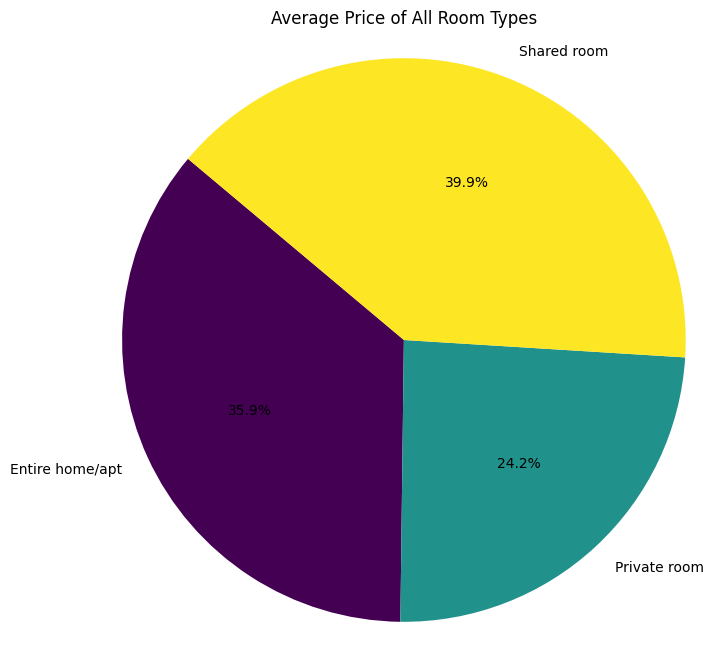

In [39]:
# Average price of all room types

# Group by room type and calculate the mean price
grouped_data = airbnb_df.groupby('room_type')['price'].mean()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(np.linspace(0, 1, len(grouped_data))))
plt.title('Average Price of All Room Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [40]:
# Average Ratings of all Property Types

grouped_data = airbnb_df.groupby('property_type')['rating'].mean().reset_index()
pt_rating_df = pd.DataFrame(grouped_data)

# Plotly Express bar chart with hovering
fig = px.bar(grouped_data, x='property_type', y='rating', color='property_type',
                title='Average Ratings of all Property Types',
                labels={'Property_type': 'property Type', 'Rating': 'rating'},
                hover_name='property_type', hover_data={'rating': True})

# Customize layout if needed
fig.update_layout(xaxis_title='Property Type', yaxis_title='Rating', xaxis_tickangle=60)

# Show the plot
fig.show()

<Axes: title={'center': 'Correlation between room pricing and fundamental room attributes'}>

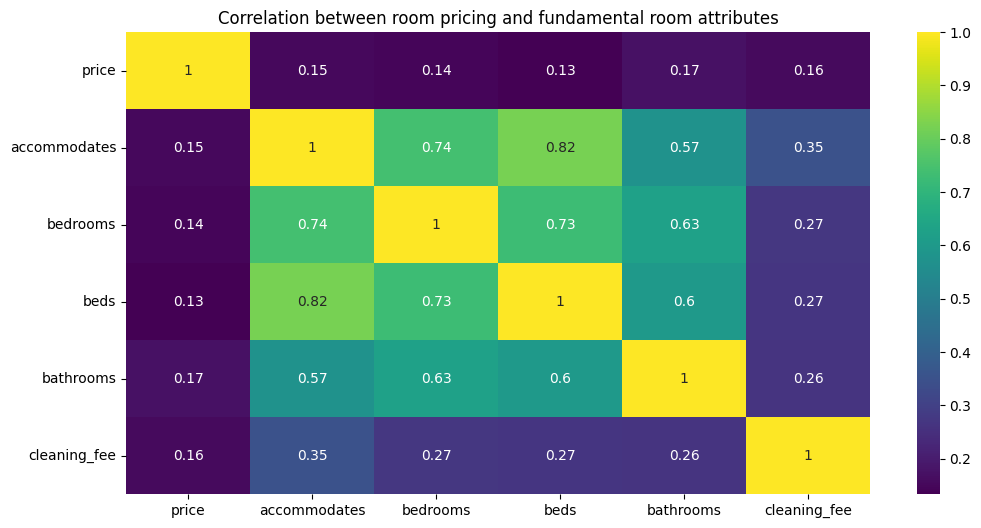

In [41]:
# Correlation between room pricing and fundamental room attributes

cor=airbnb_df[['price', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'cleaning_fee']].corr()

plt.figure(figsize=(12,6))
plt.title('Correlation between room pricing and fundamental room attributes')
sns.heatmap(cor,annot=True,cmap='viridis')

<Axes: title={'center': 'Correlation between Room pricing and Ratings'}>

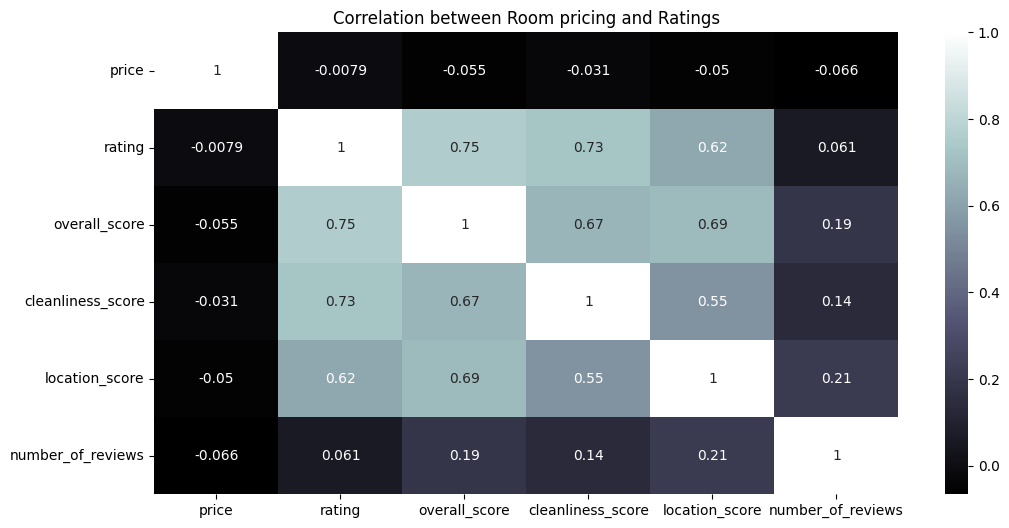

In [42]:
# Correlation between room pricing and ratings

cor=airbnb_df[['price', 'rating', 'overall_score', 'cleanliness_score', 'location_score', 'number_of_reviews']].corr()

plt.figure(figsize=(12,6))
plt.title('Correlation between Room pricing and Ratings')
sns.heatmap(cor,annot=True,cmap='bone')

SQL Migration

In [44]:
# SQL Connection to python

import mysql.connector
from sqlalchemy import create_engine

mydb = mysql.connector.connect(host="localhost",user="root",password="")
mycursor = mydb.cursor(buffered=True,)

# creating database and using for table creation

mycursor.execute('create database if not exists airbnb')
mycursor.execute('use airbnb')


In [45]:
# Created Hotels_info table in sql database and inserted the values 

mycursor.execute('''create table if not exists hotels_info (id VARCHAR(50) PRIMARY KEY, listing_url VARCHAR(500),
                name VARCHAR(100), description TEXT, neighborhood_overview TEXT, transit TEXT, street VARCHAR(100),
                suburb VARCHAR(100), government_area VARCHAR(100), market VARCHAR(100), country VARCHAR(100),
                country_code VARCHAR(50), coordinates VARCHAR(100), price INT, weekly_price INT, monthly_price INT, 
                security_deposit INT, cleaning_fee INT, cancellation_policy VARCHAR(50))
                    ''')

insert_value='''INSERT INTO hotels_info (id, listing_url, name, description, neighborhood_overview, transit, street,suburb,
                government_area, market, country, country_code, coordinates, price, weekly_price, monthly_price,
                security_deposit, cleaning_fee, cancellation_policy) 
                VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'''

data = [tuple(row) for row in Hotel_info.values]

mycursor.executemany(insert_value,data)
mydb.commit()

In [46]:
# Created Rooms_info table in sql database and inserted the values 

mycursor.execute('''create table if not exists rooms_info (id VARCHAR(50), images VARCHAR(500), property_type VARCHAR(50),
                room_type VARCHAR(50), bed_type VARCHAR(50), minimum_nights VARCHAR(10), maximum_nights VARCHAR(10),
                accommodates INT, bedrooms INT, beds INT, bathrooms INT, amenities TEXT, guests_included INT,
                availability_30 INT, availability_60 INT, availability_90 INT, availability_365 INT,
                FOREIGN KEY(id) REFERENCES hotels_info(id))
                ''') 

insert_value='''INSERT INTO rooms_info (id, images, property_type, room_type, bed_type, minimum_nights, maximum_nights,
                accommodates, bedrooms, beds, bathrooms, amenities, guests_included, availability_30, availability_60,
                availability_90, availability_365)
                VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'''

data= [tuple(row) for row in Room_info.values]

mycursor.executemany(insert_value,data)

mydb.commit()

In [47]:
# Created Hosts_info table in sql database and inserted the values 

mycursor.execute('''create table if not exists host_info (id VARCHAR(50), host_id VARCHAR(50), host_url VARCHAR(500),
                host_name VARCHAR(100), host_location VARCHAR(100), host_about TEXT, host_picture_url VARCHAR(500),
                host_neighbourhood VARCHAR(500), host_response_rate INT, host_total_listings INT, host_verifications VARCHAR(500),
                FOREIGN KEY(id) REFERENCES hotels_info(id))
                ''')

insert_value='''INSERT INTO host_info (id, host_id, host_url, host_name, host_location, host_about, host_picture_url,
                host_neighbourhood, host_response_rate, host_total_listings, host_verifications)
                VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'''

data= [tuple(row) for row in Host_info.values]

mycursor.executemany(insert_value,data)

mydb.commit()

In [48]:
# Created Reviwes_info table in sql database and inserted the values 

mycursor.execute('''create table if not exists reviews_info (id VARCHAR(50), first_review DATETIME, last_review DATETIME,
                number_of_reviews INT, overall_score INT, cleanliness_score INT, checkin_score INT, communication_score INT,
                location_score INT, value_score INT,rating INT, FOREIGN KEY(id) REFERENCES hotels_info(id))
                ''')

insert_value='''INSERT INTO reviews_info (id, first_review, last_review, number_of_reviews, overall_score, cleanliness_score,
                checkin_score, communication_score, location_score, value_score, rating)
                VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'''

data= [tuple(row) for row in Review_info.values]

mycursor.executemany(insert_value,data)

mydb.commit()

In [49]:
# Created Comments_info table in sql database and inserted the values 

mycursor.execute('''create table if not exists comments_info (id VARCHAR(50), comment_id VARCHAR(50), date DATETIME,
                reviewer_id VARCHAR(50), reviewer_name VARCHAR(50), comments TEXT, FOREIGN KEY(id) REFERENCES hotels_info(id))
                ''')

insert_value='''INSERT INTO comments_info (id, comment_id, date, reviewer_id, reviewer_name ,comments)
                VALUES (%s,%s,%s,%s,%s,%s)'''

data= [tuple(row) for row in Review_comments_info.values]

mycursor.executemany(insert_value,data)

mydb.commit()